# Benchmark Results Visualization

## Text models Performance, depending on Conversation Length

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

# reading logs data

class Results:
    
    def __init__(self, train_log_url, eval_log_url):

        # importing train log data
        with open(train_log_url) as f:
            lines = f.readlines()
            self.optimizer = lines[0]
            self.batch_size = int(lines[2])
            self.conv_length = int(lines[4])
            self.train_accuracy = float(lines[6])
            self.train_f1_weighted = float(lines[8])
            self.val_accuracy = float(lines[10])
            self.val_f1_weighted = float(lines[12])
            self.train_time = float(lines[14])

        # importing evalusation data
        with open(eval_log_url) as f:
            lines = f.readlines()
            self.val_f1_all = np.array(lines[1].replace('[','').replace(']','').split()).astype(float) 
            self.val_f1_macro = float(lines[3].strip())
            self.val_f1_weighted = float(lines[5].strip())
            self.test_f1_all = np.array(lines[7].replace('[','').replace(']','').split()).astype(float)
            self.test_f1_macro = float(lines[9].strip())
            self.test_f1_weighted = float(lines[11].strip())
            self.test_prediction_time = float(lines[13].strip())
    
    def __str__(self):
        return str(vars(res))

# without class weights

albert_results = [Results(train_log_url = f'./results/text/ALBERT/logs/log_conv{i}_TextTransformer_s42.txt',
    eval_log_url=f'./results/text/ALBERT/logs/log_conv{i}_TextTransformer_s42_results.txt') for i in range(1,5)]

text_bilstm_results = [Results(train_log_url = f'./results/text/BiLSTM/logs/log_conv{i}_SimpleTextModel_s42.txt',
    eval_log_url=f'./results/text/BiLSTM/logs/log_conv{i}_SimpleTextModel_s42_results.txt') for i in range(1,5)]

albert_results_classweight = Results(train_log_url = f'./results/text/ALBERT/logs/classweight/log_conv3_TextTransformer_cw_s42.txt',
    eval_log_url=f'./results/text/ALBERT/logs/classweight/log_conv3_TextTransformer_cw_s42_results.txt') 

text_bilstm_results_classweight = Results(train_log_url = f'./results/text/BiLSTM/logs/classweight/log_conv3_SimpleTextModel_cw_s42.txt',
    eval_log_url=f'./results/text/BiLSTM/logs/classweight/log_conv3_SimpleTextModel_cw_s42_results.txt')

# using class weights and conv_length = 3



### F1

#### F1 by class

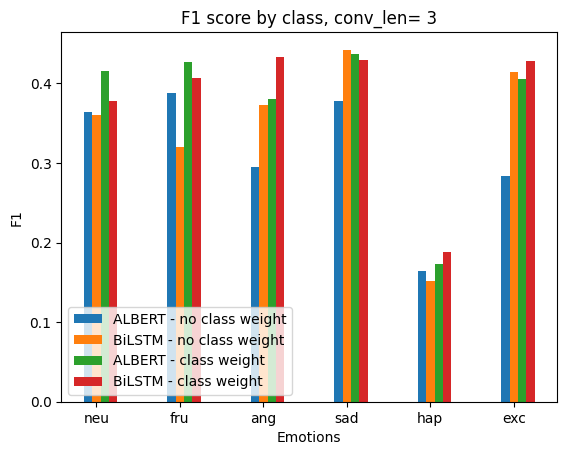

In [2]:
## f1 values by class
# are these the ones we are considering?
conv_len = 3
label2id = ['neu', 'fru', 'ang', 'sad', 'hap', 'exc']
albert_f1_byclass = albert_results[conv_len-1].test_f1_all[:6]
text_bilstm_f1_byclass = text_bilstm_results[conv_len-1].test_f1_all[:6] 
albert_f1_byclass_classweight = albert_results_classweight.test_f1_all[:6]
text_bilstm_f1_byclass_classweight = text_bilstm_results_classweight.test_f1_all[:6] 
  
X_axis = np.arange(len(label2id))
  
plt.bar(X_axis - 0.1, albert_f1_byclass, 0.1, label = 'ALBERT - no class weight')
plt.bar(X_axis, text_bilstm_f1_byclass, 0.1, label = 'BiLSTM - no class weight')
plt.bar(X_axis + 0.1, albert_f1_byclass_classweight, 0.1, label = 'ALBERT - class weight')
plt.bar(X_axis + 0.2, text_bilstm_f1_byclass_classweight, 0.1, label = 'BiLSTM - class weight')

plt.xticks(X_axis, label2id)
plt.xlabel("Emotions")
plt.ylabel("F1")
plt.title(f"F1 score by class, conv_len= {conv_len}")
plt.legend( loc='lower left')
plt.show()

To compare results between the various models, we've selected the ones built with a $conversation_{length} = 3$, this is not the conversation length for which we can obtain the best results, however, the computational resources at our disposal are limited and we were interested to do this comparison with models that we could actually pair.

ALBERT and the simple BiLSTM model are quite comparable: 
ALBERT mantains a sensible advantage on the classes $neutral$ and $fru$ (also, a slight advantage on the class $happy$), while it's outperformed by the text BiLSTM in the remaining set of emotions $angry$, $sad$, $excited$.
the effect of the usage of class weighting generally improves the performance: this is an improvement reflected on all the classes for the Transformer-based model, while for the lighter model a strong improvement is noticed for all the classes apart from the $sad$ emotion. 

#### F1 weighted

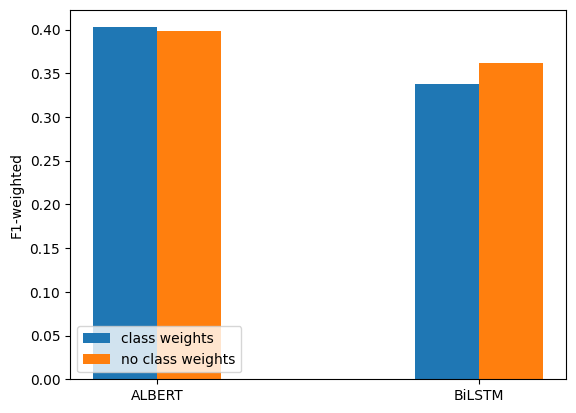

In [3]:

models = ['ALBERT', 'BiLSTM']
X_axis = np.arange(len(models))

plt.bar(X_axis-0.1, [albert_results_classweight.test_f1_weighted,albert_results[2].test_f1_weighted], 0.2, label = 'class weights')
plt.bar(X_axis+0.1, [text_bilstm_results_classweight.test_f1_weighted,text_bilstm_results[2].test_f1_weighted], 0.2, label = 'no class weights')

plt.xticks(X_axis, models)
plt.xlabel("")
plt.ylabel("F1-weighted")
plt.title(f"")
plt.legend( loc='lower left')
plt.show()

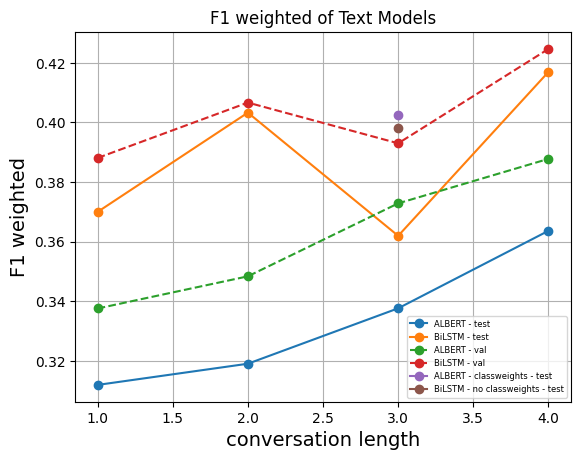

In [4]:
albert_f1_weighted_test = [i.test_f1_weighted for i in albert_results]
text_bilstm_f1_weighted_test = [i.test_f1_weighted for i in text_bilstm_results]
albert_f1_weighted_test_classweights = albert_results_classweight.test_f1_weighted
text_bilstm_f1_weighted_test_classweights = text_bilstm_results_classweight.test_f1_weighted
albert_f1_weighted_val = [i.val_f1_weighted for i in albert_results]
text_bilstm_f1_weighted_val = [i.val_f1_weighted for i in text_bilstm_results]
albert_convlen = [i.conv_length for i in albert_results]

## F1 weighted depending on conversation length
plt.plot(albert_convlen, albert_f1_weighted_test, marker='o', label='ALBERT - test')
plt.plot(albert_convlen, text_bilstm_f1_weighted_test, marker='o', label='BiLSTM - test')
plt.plot(albert_convlen, albert_f1_weighted_val, linestyle='--', marker='o', label='ALBERT - val')
plt.plot(albert_convlen, text_bilstm_f1_weighted_val, linestyle='--', marker='o', label='BiLSTM - val')
plt.plot([3], albert_f1_weighted_test_classweights, marker='o', label='ALBERT - classweights - test ')
plt.plot([3], text_bilstm_f1_weighted_test_classweights, marker='o', label='BiLSTM - no classweights - test')
plt.ylabel('F1 weighted', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('F1 weighted of Text Models')
plt.grid()
plt.legend(fontsize=6)
plt.show()


In this figure we can see the different results on the $F1_{weighted}$ scores. For visualization purposes, we limit to show the results for the different models just for test and validation sets when not using class weights, while just for test set and for $conversation_{length} =3$ when using class weights. 

#### F1 macro

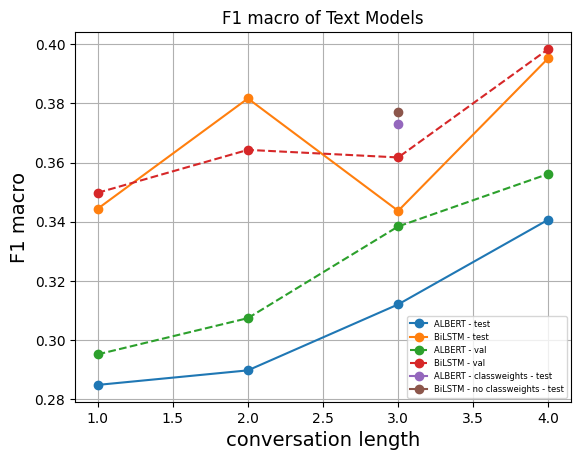

In [5]:
albert_f1_macro_test = [i.test_f1_macro for i in albert_results]
text_bilstm_f1_macro_test = [i.test_f1_macro for i in text_bilstm_results]
albert_f1_macro_test_classweights = albert_results_classweight.test_f1_macro
text_bilstm_f1_macro_test_classweights = text_bilstm_results_classweight.test_f1_macro
albert_f1_macro_val = [i.val_f1_macro for i in albert_results]
text_bilstm_f1_macro_val = [i.val_f1_macro for i in text_bilstm_results]
albert_convlen = [i.conv_length for i in albert_results]

## F1 macro depending on conversation length
plt.plot(albert_convlen, albert_f1_macro_test, marker='o', label='ALBERT - test')
plt.plot(albert_convlen, text_bilstm_f1_macro_test, marker='o', label='BiLSTM - test')
plt.plot(albert_convlen, albert_f1_macro_val, linestyle='--', marker='o', label='ALBERT - val')
plt.plot(albert_convlen, text_bilstm_f1_macro_val, linestyle='--', marker='o', label='BiLSTM - val')
plt.plot([3], albert_f1_macro_test_classweights, marker='o', label='ALBERT - classweights - test ')
plt.plot([3], text_bilstm_f1_macro_test_classweights, marker='o', label='BiLSTM - no classweights - test')
plt.ylabel('F1 macro', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('F1 macro of Text Models')
plt.grid()
plt.legend(fontsize=6)
plt.show()

In this figure we can see the different results on the $F1_{macro}$ scores. For visualization purposes, we limit to show the results for the different models just for test and validation sets when not using class weights, while just for test set and for $conversation_{length} =3$ when using class weights. 

### Training Time

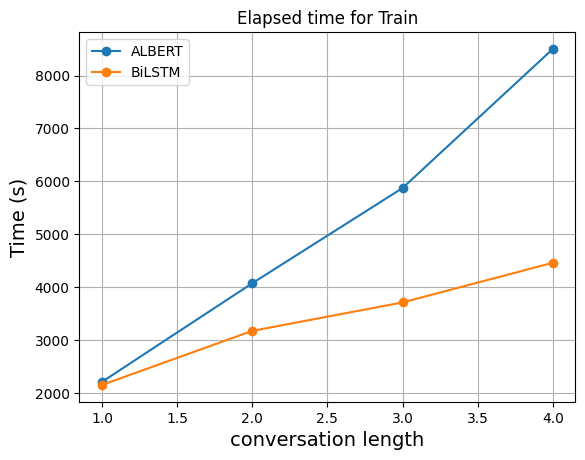

In [6]:
# train time
albert_train_time = [i.train_time for i in albert_results]
text_bilstm_train_time = [i.train_time for i in text_bilstm_results]

albert_results_convlen = [i.conv_length for i in albert_results]

## Elapsed time (s) depending on conversation length

plt.plot(albert_results_convlen, albert_train_time, linestyle='-', marker='o', label='ALBERT')
plt.plot(albert_results_convlen, text_bilstm_train_time, linestyle='-', marker='o', label='BiLSTM')
plt.ylabel('Time (s)', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('Elapsed time for Train')
plt.grid()
plt.legend()
plt.show()


### Inference Time

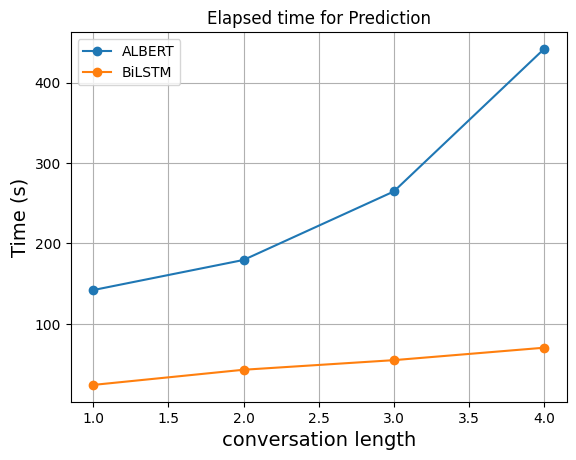

In [7]:
# prediction time
albert_eval_time = [i.test_prediction_time for i in albert_results]
text_bilstm_eval_time = [i.test_prediction_time for i in text_bilstm_results]

plt.plot(albert_results_convlen, albert_eval_time, marker='o', label='ALBERT')
plt.plot(albert_results_convlen, text_bilstm_eval_time, marker='o', label='BiLSTM')
plt.ylabel('Time (s)', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('Elapsed time for Prediction')
plt.grid()
plt.legend()
plt.show()

## Audio models Performance, depending on Conversation Length

### F1

#### F1 by class

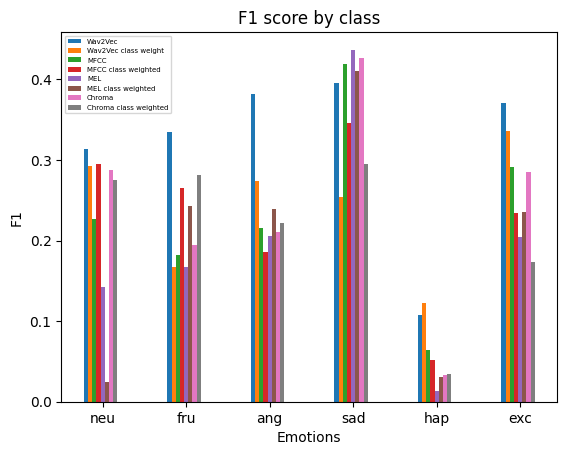

In [8]:
# results with class weights
wav2vec_results = [Results(train_log_url = f'./results/audio/Wav2Vec/quantile_0.1/log_conv{i}_AudioTransformer_s42.txt',
    eval_log_url=f'./results/audio/Wav2Vec/quantile_0.1/log_conv{i}_AudioTransformer_s42_results.txt') for i in range(1,4)]

mfcc_results = [Results(train_log_url = f'./results/audio/LiteModel/mfcc/log/log_conv{i}_SimpleAudioModel_mfcc_s42.txt',
    eval_log_url=f'./results/audio/LiteModel/mfcc/log/log_conv{i}_SimpleAudioModel_mfcc_s42_results.txt') for i in range(1,6)]

rms_results = [Results(train_log_url = f'./results/audio/LiteModel/rms/log/log_conv{i}_SimpleAudioModel_rms_s42.txt',
    eval_log_url=f'./results/audio/LiteModel/rms/log/log_conv{i}_SimpleAudioModel_rms_s42_results.txt') for i in range(1,6)]

zcr_results = [Results(train_log_url = f'./results/audio/LiteModel/zcr/log/log_conv{i}_SimpleAudioModel_zcr_s42.txt',
    eval_log_url=f'./results/audio/LiteModel/zcr/log/log_conv{i}_SimpleAudioModel_zcr_s42_results.txt') for i in range(1,6)]

mel_results = [Results(train_log_url = f'./results/audio/LiteModel/mel/log/log_conv{i}_SimpleAudioModel_mel_s42.txt',
    eval_log_url=f'./results/audio/LiteModel/mel/log/log_conv{i}_SimpleAudioModel_mel_s42_results.txt') for i in range(1,6)]

chroma_results = [Results(train_log_url = f'./results/audio/LiteModel/chroma/log/log_conv{i}_SimpleAudioModel_chroma_s42.txt',
    eval_log_url=f'./results/audio/LiteModel/chroma/log/log_conv{i}_SimpleAudioModel_chroma_s42_results.txt') for i in range(1,6)]

# results with class weights and conv_length=3
wav2vec_results_weighted = Results(train_log_url = f'./results/audio/Wav2Vec/quantile_0.1/classweight/log_conv3_AudioTransformer_cw_s42.txt',
    eval_log_url=f'./results/audio/Wav2Vec/quantile_0.1/classweight/log_conv3_AudioTransformer_cw_s42_results.txt')

mfcc_results_weighted = Results(train_log_url = f'./results/audio/LiteModel/mfcc/log/classweight/log_conv3_SimpleAudioModel_mfcc_cw_s42.txt',
    eval_log_url=f'./results/audio/LiteModel/mfcc/log/classweight/log_conv3_SimpleAudioModel_mfcc_cw_s42_results.txt')

rms_results_weighted = Results(train_log_url = f'./results/audio/LiteModel/rms/log/classweight/log_conv3_SimpleAudioModel_rms_cw_s42.txt',
    eval_log_url=f'./results/audio/LiteModel/rms/log/classweight/log_conv3_SimpleAudioModel_rms_cw_s42_results.txt')

zcr_results_weighted = Results(train_log_url = f'./results/audio/LiteModel/zcr/log/classweight/log_conv3_SimpleAudioModel_zcr_cw_s42.txt',
    eval_log_url=f'./results/audio/LiteModel/zcr/log/classweight/log_conv3_SimpleAudioModel_zcr_cw_s42_results.txt')

mel_results_weighted = Results(train_log_url = f'./results/audio/LiteModel/mel/log/classweight/log_conv3_SimpleAudioModel_mel_cw_s42.txt',
    eval_log_url=f'./results/audio/LiteModel/mel/log/classweight/log_conv3_SimpleAudioModel_mel_cw_s42_results.txt')

chroma_results_weighted = Results(train_log_url = f'./results/audio/LiteModel/chroma/log/classweight/log_conv3_SimpleAudioModel_chroma_cw_s42.txt',
    eval_log_url=f'./results/audio/LiteModel/chroma/log/classweight/log_conv3_SimpleAudioModel_chroma_cw_s42_results.txt')


label2id = ['neu', 'fru', 'ang', 'sad', 'hap', 'exc']

wav2vec_f1_byclass = wav2vec_results[2].test_f1_all[:6]
mfcc_f1_byclass = mfcc_results[2].test_f1_all[:6]
rms_f1_byclass = rms_results[2].test_f1_all[:6]
zcr_f1_byclass = zcr_results[2].test_f1_all[:6]
mel_f1_byclass = mel_results[2].test_f1_all[:6]
chroma_f1_byclass = chroma_results[2].test_f1_all[:6]

# class weighted model results

wav2vec_f1_byclass_weighted = wav2vec_results_weighted.test_f1_all[:6]
mfcc_f1_byclass_weighted = mfcc_results_weighted.test_f1_all[:6]
rms_f1_byclass_weighted = rms_results_weighted.test_f1_all[:6]
zcr_f1_byclass_weighted = zcr_results_weighted.test_f1_all[:6]
mel_f1_byclass_weighted = mel_results_weighted.test_f1_all[:6]
chroma_f1_byclass_weighted = chroma_results_weighted.test_f1_all[:6]


X_axis = np.arange(len(label2id))
  
plt.bar(X_axis - 0.20, wav2vec_f1_byclass, 0.05, label = 'Wav2Vec')
plt.bar(X_axis - 0.15, wav2vec_f1_byclass_weighted, 0.05, label = 'Wav2Vec class weight')
plt.bar(X_axis - 0.10, mfcc_f1_byclass, 0.05, label = 'MFCC')
plt.bar(X_axis - 0.05, mfcc_f1_byclass_weighted, 0.05, label = 'MFCC class weighted')
plt.bar(X_axis, mel_f1_byclass, 0.05, label = 'MEL')
plt.bar(X_axis + 0.05, mel_f1_byclass_weighted, 0.05, label = 'MEL class weighted')
plt.bar(X_axis + 0.10, chroma_f1_byclass, 0.05, label = 'Chroma')
plt.bar(X_axis + 0.15, chroma_f1_byclass_weighted, 0.05, label = 'Chroma class weighted')


  
plt.xticks(X_axis, label2id)
plt.xlabel("Emotions")
plt.ylabel("F1")
plt.title("F1 score by class")
plt.legend(fontsize=5)
plt.show()

#### F1 Weighted

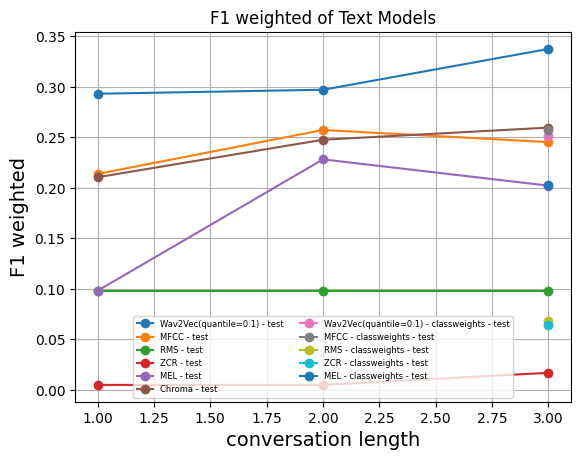

In [9]:
wav2vec_convlen = [i.conv_length for i in wav2vec_results]
wav2vec_f1_weighted_test = [i.test_f1_weighted for i in wav2vec_results]
mfcc_f1_weighted_test = [i.test_f1_weighted for i in mfcc_results][:3]
rms_f1_weighted_test = [i.test_f1_weighted for i in rms_results][:3]
zcr_f1_weighted_test = [i.test_f1_weighted for i in zcr_results][:3]
mel_f1_weighted_test = [i.test_f1_weighted for i in mel_results][:3]
chroma_f1_weighted_test = [i.test_f1_weighted for i in chroma_results][:3]
# class weight results f1-weighted
wav2vec_f1_weighted_test_classweight = wav2vec_results_weighted.test_f1_weighted
mfcc_f1_weighted_test_classweight = mfcc_results_weighted.test_f1_weighted
rms_f1_weighted_test_classweight = rms_results_weighted.test_f1_weighted
zcr_f1_weighted_test_classweight = zcr_results_weighted.test_f1_weighted
mel_f1_weighted_test_classweight = mel_results_weighted.test_f1_weighted
chroma_f1_weighted_test_classweight = chroma_results_weighted.test_f1_weighted

## F1 weighted depending on conversation length
plt.plot(wav2vec_convlen, wav2vec_f1_weighted_test, marker='o', label='Wav2Vec(quantile=0.1) - test')
plt.plot(wav2vec_convlen, mfcc_f1_weighted_test, marker='o', label='MFCC - test')
plt.plot(wav2vec_convlen, rms_f1_weighted_test, marker='o', label='RMS - test')
plt.plot(wav2vec_convlen, zcr_f1_weighted_test, marker='o', label='ZCR - test')
plt.plot(wav2vec_convlen, mel_f1_weighted_test, marker='o', label='MEL - test')
plt.plot(wav2vec_convlen, chroma_f1_weighted_test, marker='o', label='Chroma - test')
# adding experiments with class weighting, conv_len=3
plt.plot()
plt.plot([3], wav2vec_f1_weighted_test_classweight, marker='o', label='Wav2Vec(quantile=0.1) - classweights - test')
plt.plot([3], mfcc_f1_weighted_test_classweight, marker='o', label='MFCC - classweights - test')
plt.plot([3], rms_f1_weighted_test_classweight, marker='o', label='RMS - classweights - test')
plt.plot([3], zcr_f1_weighted_test_classweight, marker='o', label='ZCR - classweights - test')
plt.plot([3], mel_f1_weighted_test_classweight, marker='o', label='MEL - classweights - test')

plt.ylabel('F1 weighted', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('F1 weighted of Text Models')
plt.grid()
plt.legend(fontsize=6,ncols=2, loc='lower center')
plt.show()

#### F1 macro

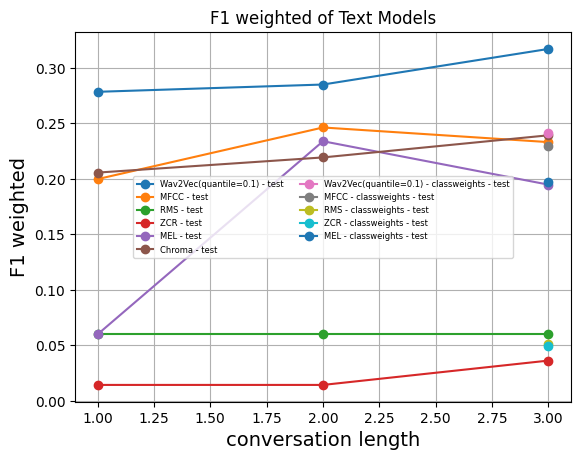

In [10]:
wav2vec_convlen = [i.conv_length for i in wav2vec_results]
wav2vec_f1_macro_test = [i.test_f1_macro for i in wav2vec_results]
mfcc_f1_macro_test = [i.test_f1_macro for i in mfcc_results][:3]
rms_f1_macro_test = [i.test_f1_macro for i in rms_results][:3]
zcr_f1_macro_test = [i.test_f1_macro for i in zcr_results][:3]
mel_f1_macro_test = [i.test_f1_macro for i in mel_results][:3]
chroma_f1_macro_test = [i.test_f1_macro for i in chroma_results][:3]
# class weight results f1-weighted
wav2vec_f1_macro_test_classweight = wav2vec_results_weighted.test_f1_macro
mfcc_f1_macro_test_classweight = mfcc_results_weighted.test_f1_macro
rms_f1_macro_test_classweight = rms_results_weighted.test_f1_macro
zcr_f1_macro_test_classweight = zcr_results_weighted.test_f1_macro
mel_f1_macro_test_classweight = mel_results_weighted.test_f1_macro
chroma_f1_macro_test_classweight = chroma_results_weighted.test_f1_macro

## F1 weighted depending on conversation length
plt.plot(wav2vec_convlen, wav2vec_f1_macro_test, marker='o', label='Wav2Vec(quantile=0.1) - test')
plt.plot(wav2vec_convlen, mfcc_f1_macro_test, marker='o', label='MFCC - test')
plt.plot(wav2vec_convlen, rms_f1_macro_test, marker='o', label='RMS - test')
plt.plot(wav2vec_convlen, zcr_f1_macro_test, marker='o', label='ZCR - test')
plt.plot(wav2vec_convlen, mel_f1_macro_test, marker='o', label='MEL - test')
plt.plot(wav2vec_convlen, chroma_f1_macro_test, marker='o', label='Chroma - test')

# adding experiments with class weighting, conv_len=3
plt.plot([3], wav2vec_f1_macro_test_classweight, marker='o', label='Wav2Vec(quantile=0.1) - classweights - test')
plt.plot([3], mfcc_f1_macro_test_classweight, marker='o', label='MFCC - classweights - test')
plt.plot([3], rms_f1_macro_test_classweight, marker='o', label='RMS - classweights - test')
plt.plot([3], zcr_f1_macro_test_classweight, marker='o', label='ZCR - classweights - test')
plt.plot([3], mel_f1_macro_test_classweight, marker='o', label='MEL - classweights - test')

plt.ylabel('F1 weighted', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('F1 weighted of Text Models')
plt.grid()
plt.legend(fontsize=6,ncols=2)
plt.show()

In this figure we can see the different results on the $F1_{macro}$ scores. For visualization purposes, we limit to show the results for the different models just for test and validation sets when not using class weights, while just for test set and for $conversation_{length} =3$ when using class weights. 

### Training Time

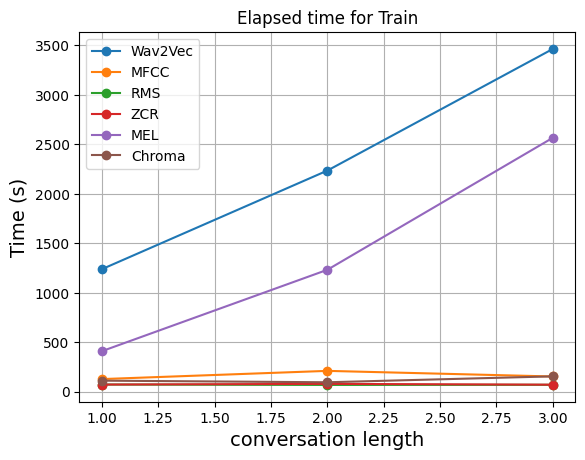

In [11]:
# train time
wav2vec_train_time = [i.train_time for i in wav2vec_results]
mfcc_train_time = [i.train_time for i in mfcc_results][:3]
rms_train_time = [i.train_time for i in rms_results][:3]
zcr_train_time = [i.train_time for i in zcr_results][:3]
mel_train_time = [i.train_time for i in mel_results][:3]
chroma_train_time = [i.train_time for i in chroma_results][:3]

wav2vec_convlen = [i.conv_length for i in wav2vec_results]
## Elapsed time (s) depending on conversation length

plt.plot(wav2vec_convlen, wav2vec_train_time, marker='o', label='Wav2Vec')
plt.plot(wav2vec_convlen, mfcc_train_time, marker='o', label='MFCC')
plt.plot(wav2vec_convlen, rms_train_time, marker='o', label='RMS')
plt.plot(wav2vec_convlen, zcr_train_time, marker='o', label='ZCR')
plt.plot(wav2vec_convlen, mel_train_time, marker='o', label='MEL')
plt.plot(wav2vec_convlen, chroma_train_time, marker='o', label='Chroma')

plt.ylabel('Time (s)', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('Elapsed time for Train')
plt.grid()
plt.legend()
plt.show()

### Inference Time

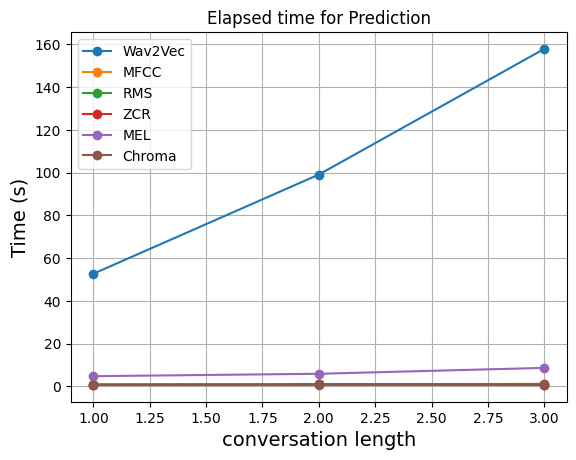

In [12]:
# train time
wav2vec_train_time = [i.test_prediction_time for i in wav2vec_results]
mfcc_train_time = [i.test_prediction_time for i in mfcc_results][:3]
rms_train_time = [i.test_prediction_time for i in rms_results][:3]
zcr_train_time = [i.test_prediction_time for i in zcr_results][:3]
mel_train_time = [i.test_prediction_time for i in mel_results][:3]
chroma_train_time = [i.test_prediction_time for i in chroma_results][:3]

wav2vec_convlen = [i.conv_length for i in wav2vec_results]
## Elapsed time (s) depending on conversation length

plt.plot(wav2vec_convlen, wav2vec_train_time, marker='o', label='Wav2Vec')
plt.plot(wav2vec_convlen, mfcc_train_time, marker='o', label='MFCC')
plt.plot(wav2vec_convlen, rms_train_time, marker='o', label='RMS')
plt.plot(wav2vec_convlen, zcr_train_time, marker='o', label='ZCR')
plt.plot(wav2vec_convlen, mel_train_time, marker='o', label='MEL')
plt.plot(wav2vec_convlen, chroma_train_time, marker='o', label='Chroma')

plt.ylabel('Time (s)', fontsize=14)
plt.xlabel('conversation length', fontsize=14)
plt.title('Elapsed time for Prediction')
plt.grid()
plt.legend()
plt.show()

### Wav2Vec Performance, depending on quantile

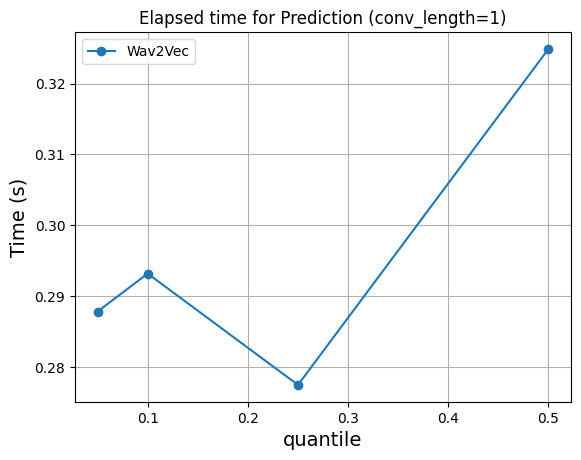

In [13]:
quantiles = [0.05,0.1,0.25,0.5]
wav2vec_results_quantiles = [Results(train_log_url = f'./results/audio/Wav2Vec/quantile_{i}/log_conv1_AudioTransformer_s42.txt',
    eval_log_url=f'./results/audio/Wav2Vec/quantile_{i}/log_conv1_AudioTransformer_s42_results.txt') for i in quantiles]

wav2vec_results_quantiles_f1_test = [i.test_f1_weighted  for i in wav2vec_results_quantiles]
wav2vec_results_quantiles_f1 = [i.test_f1_weighted  for i in wav2vec_results_quantiles]

plt.plot(quantiles, wav2vec_results_quantiles_f1, marker='o', label='Wav2Vec')

plt.ylabel('Time (s)', fontsize=14)
plt.xlabel('quantile', fontsize=14)
plt.title('Elapsed time for Prediction (conv_length=1)')
plt.grid()
plt.legend()
plt.show()